In [1]:
install.packages(c("readxl", "car", "lme4", "ggplot2"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’




In [21]:
install.packages("xtable")
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




  retired graduated 
        8         8 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = status ~ ., family = binomial, data = dd[, c("status", 
    numeric_vars)])

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                            -2.382e+01  1.714e+05       0        1
issue_average_close_time_post_downturn  2.299e+01  1.704e+05       0        1
pr_ave_merge_time_post_downturn        -3.149e-01  1.467e+05       0        1
changes_per_commit_post_downturn        4.869e+00  1.380e+05       0        1
ratio_mergedPR_post_downturn            3.023e+01  1.759e+05       0        1
num_issues_post_downturn               -8.029e+01  8.735e+05       0        1
num_open_pr_post_downturn              -4.770e+01  2.343e+05       0        1
ave_pr_comments_post_downturn          -4.565e+01  1.106e+06       0        1
num_merged_pr_post_downturn            -1.322e+02  1.883e+06       0        1
num_closed_pr_post_downturn             2.511e+02  2.671e+06       0        1
avg_monthly_commit_post_downtu

issue_average_close_time_post_downturn        pr_ave_merge_time_post_downturn 
                             10.986107                               3.860282 
      changes_per_commit_post_downturn           ratio_mergedPR_post_downturn 
                              3.285773                               5.606308 
              num_issues_post_downturn              num_open_pr_post_downturn 
                            156.096666                               5.610394 
         ave_pr_comments_post_downturn            num_merged_pr_post_downturn 
                            307.643270                             915.245870 
           num_closed_pr_post_downturn       avg_monthly_commit_post_downturn 
                           1814.026321                              32.900394

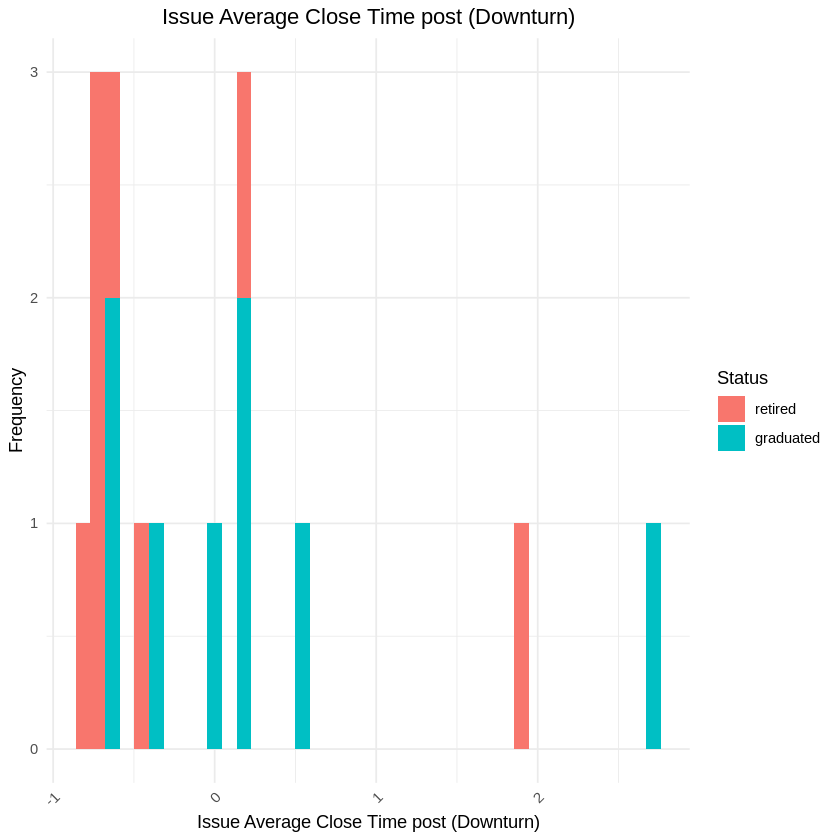

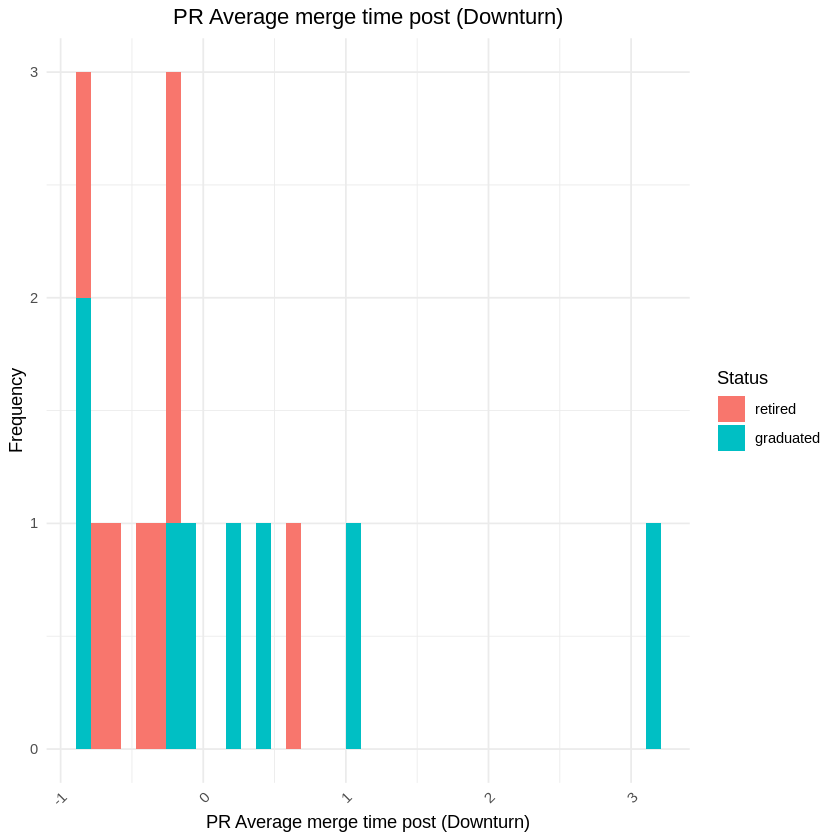

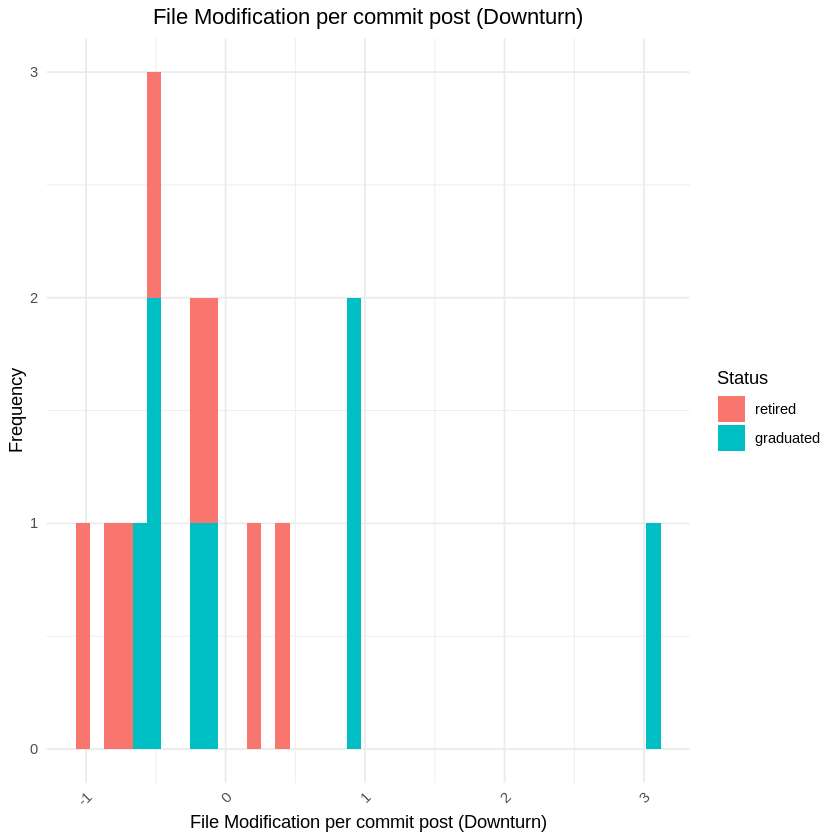

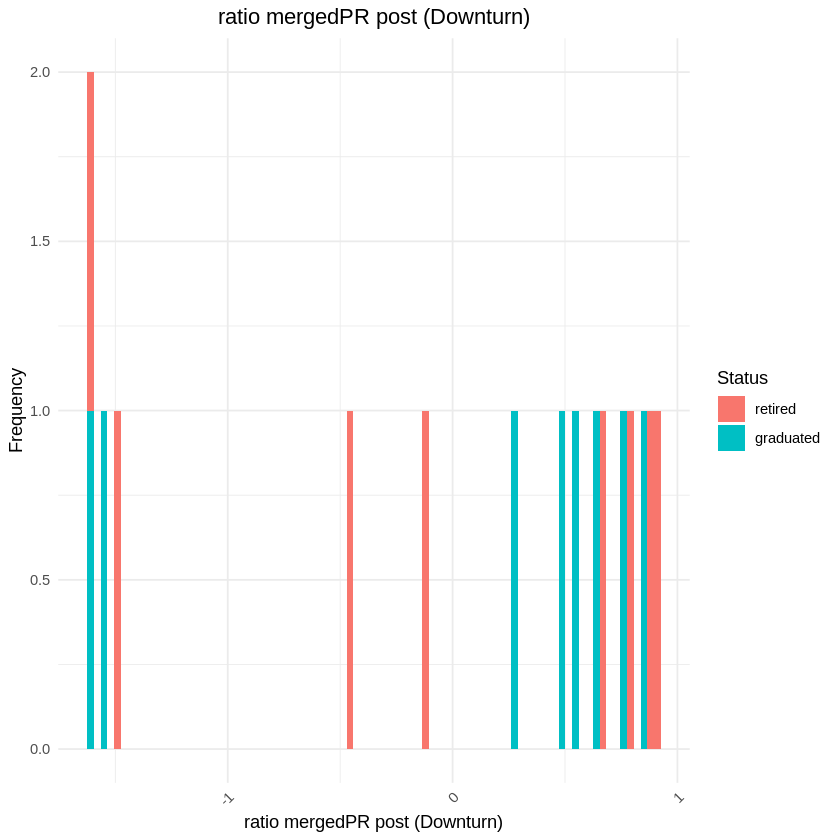

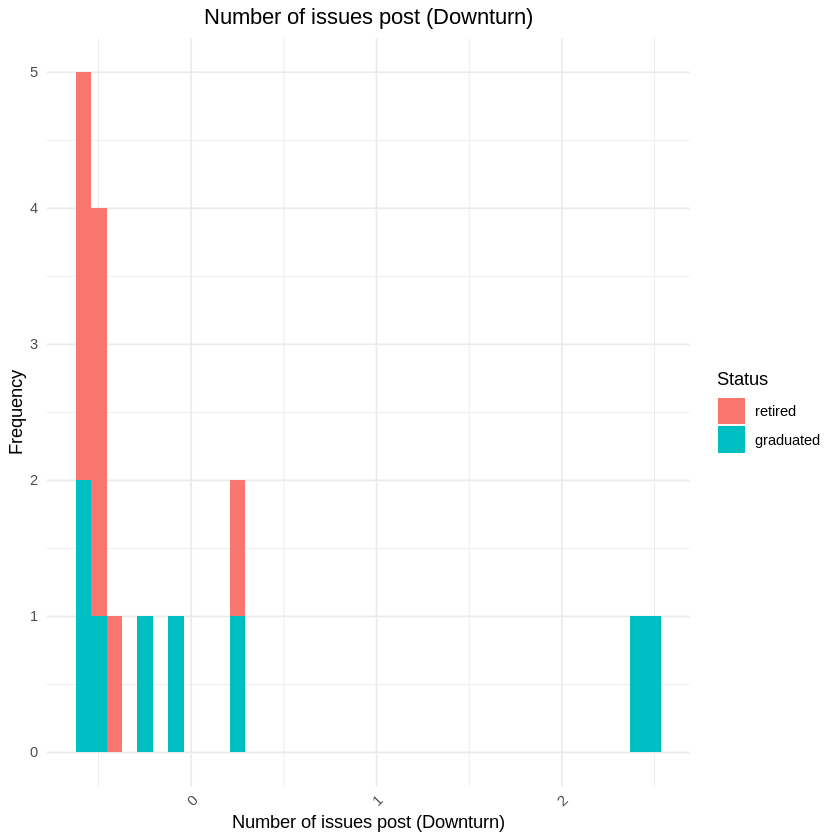

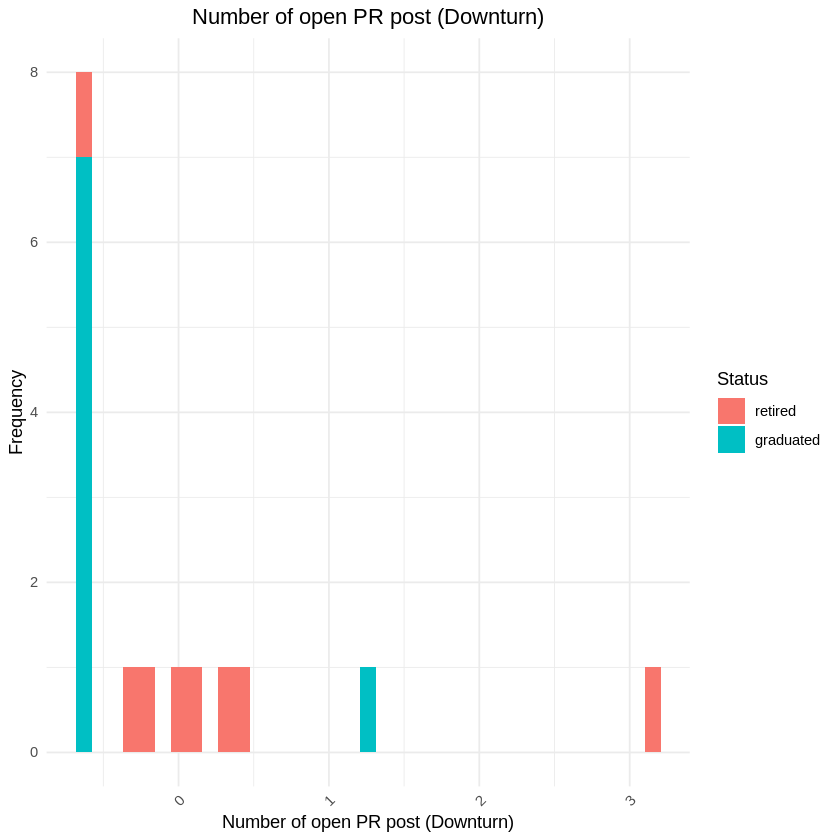

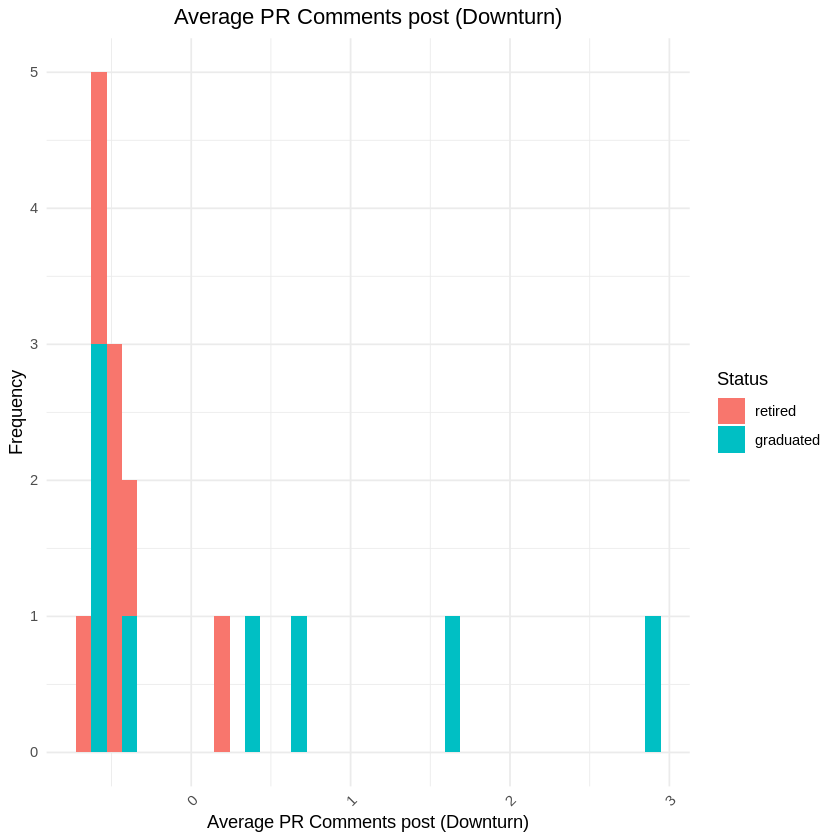

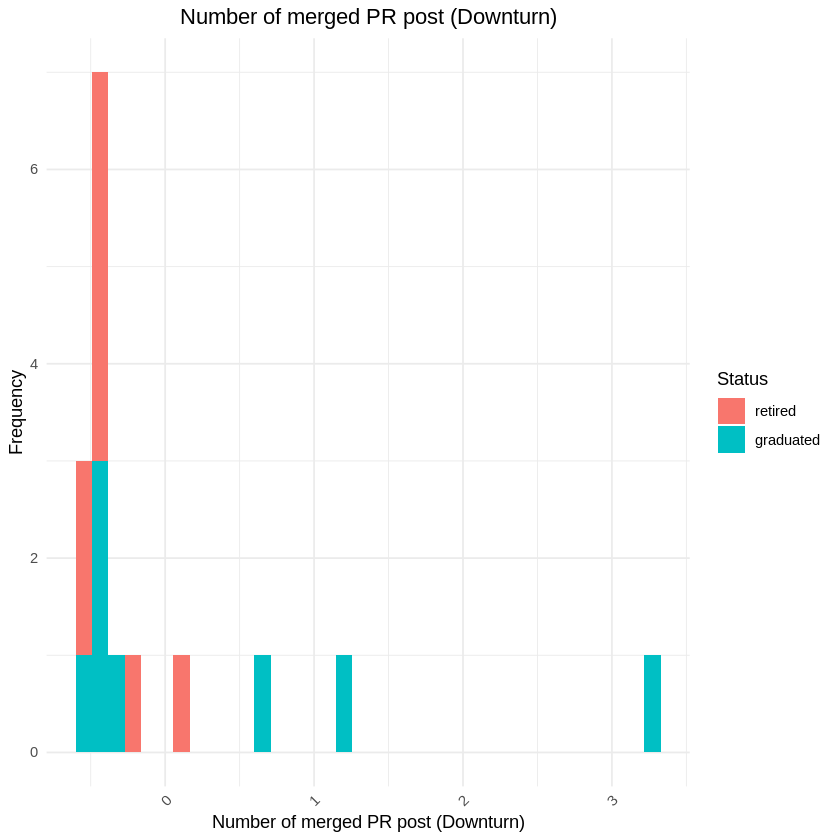

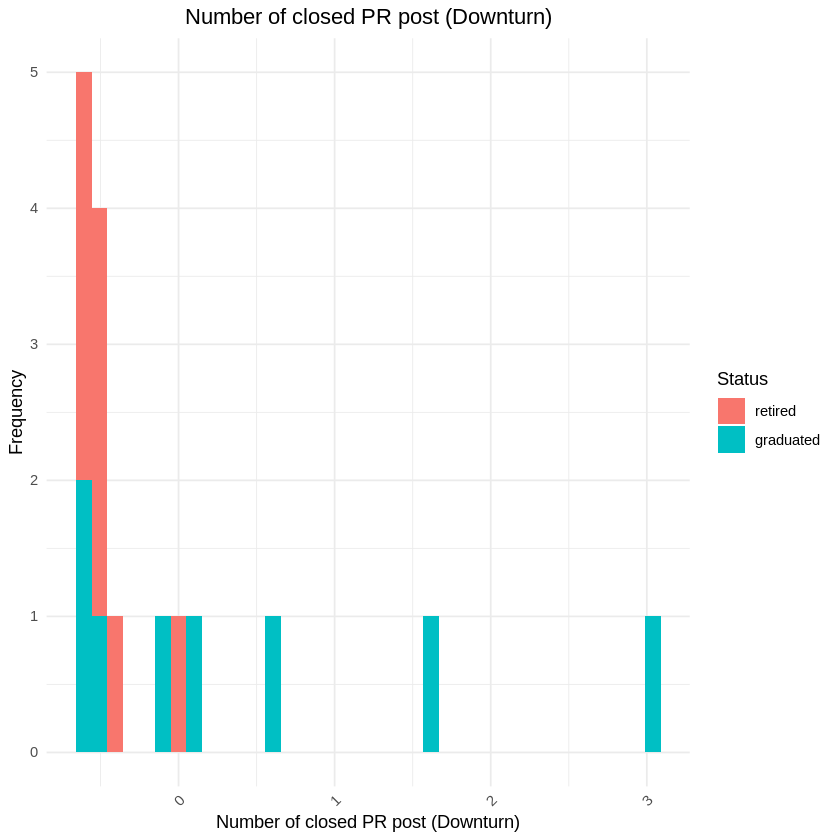

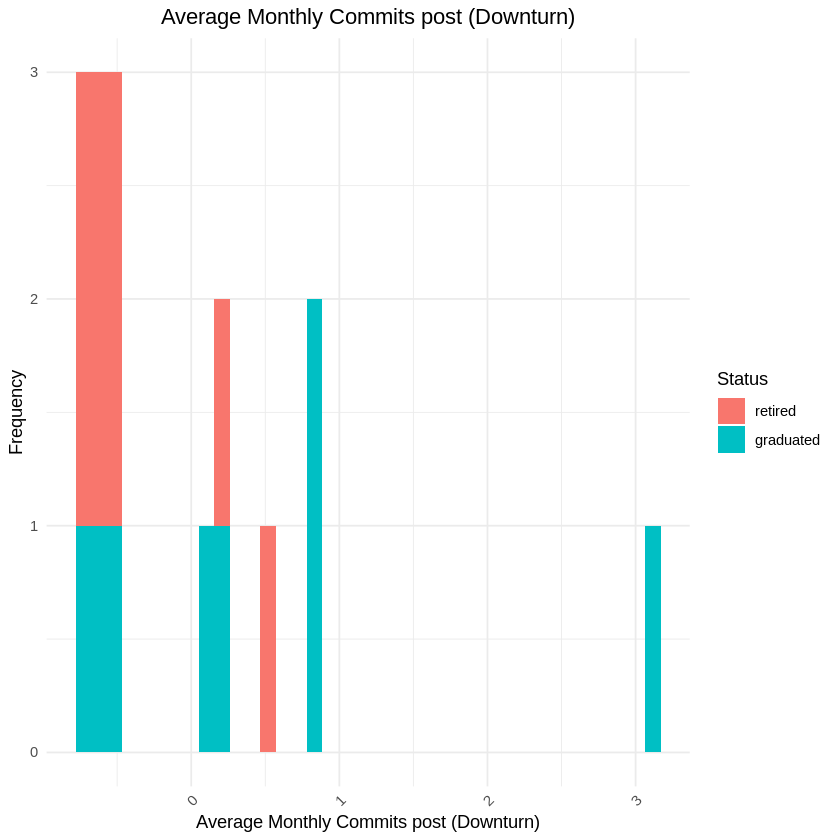

In [81]:
library(readxl)
library(car)
library(lme4)
library(ggplot2)
library(glmnet)
library(xtable)
library(gridExtra)


# Read the Excel file
dd <- read_excel("/content/updated_excel - Copy (2).xlsx")

dd$status <- factor(dd$status, levels = c(0, 1), labels = c("retired", "graduated"))

table(dd$status)

# numeric_vars <- c('issue_average_close_time_pre_downturn', 'pr_ave_merge_time_pre_downturn', 'changes_per_commit_pre_downturn', 'ratio_mergedPR_pre_downturn', 'num_issues_pre_downturn', 'num_open_pr_pre_downturn', 'ave_pr_comments_pre_downturn', 'num_merged_pr_pre_downturn', 'num_closed_pr_pre_downturn', 'avg_monthly_commit_pre_downturn')
# numeric_vars <- c('issue_average_close_time_downturn', 'pr_ave_merge_time_downturn', 'changes_per_commit_downturn', 'ratio_mergedPR_downturn', 'num_issues_downturn', 'num_open_pr_downturn', 'ave_pr_comments_downturn', 'num_merged_pr_downturn', 'num_closed_pr_downturn', 'avg_monthly_commit_downturn')
numeric_vars <- c('issue_average_close_time_post_downturn', 'pr_ave_merge_time_post_downturn', 'changes_per_commit_post_downturn', 'ratio_mergedPR_post_downturn', 'num_issues_post_downturn', 'num_open_pr_post_downturn', 'ave_pr_comments_post_downturn', 'num_merged_pr_post_downturn', 'num_closed_pr_post_downturn', 'avg_monthly_commit_post_downturn')

dd[numeric_vars] <- scale(dd[numeric_vars])

# Logistic regression for binary outcome
model_logit <- glm(status ~ ., data = dd[, c("status", numeric_vars)], family = binomial)

# Summary of the logistic regression model
summary(model_logit)

# VIF to check multicollinearity among predictors
vif(model_logit)

library(ggplot2)

# 使用ggplot2绘制直方图，并为每个变量设置易读的标题
for(var in numeric_vars) {
   # 从数据框中选择变量
  data_to_plot <- dd[[var]]

  # 为了更好地处理不同的数据范围，我们可以动态地选择binwidth
  binwidth_value <- max(data_to_plot, na.rm = TRUE) / 30

  # 创建一个易读的标题
    title <- gsub("_", " ", var)
    title <- gsub("post downturn", "(Post-Downturn)", title) # 先替换整个短语
    title <- gsub("pre downturn", "(Pre-Downturn)", title)
    title <- gsub("downturn", "(Downturn)", title) # 然后替换单独的单词
    title <- gsub("pr ave", "PR Average", title)
    title <- gsub("num", "Number of", title)
    title <- gsub("ave pr comments", "Average PR Comments", title)
    title <- gsub("avg monthly commit", "Average Monthly Commits", title)
    title <- gsub("pr", "PR", title)
    title <- gsub("changes", "File Modification", title)
    title <- gsub("ratio_mergedPR", "Merged PR ratio", title)
    title <- gsub("issue average close time", "Issue Average Close Time", title)
    readable_var <- title # 用于图表的易读变量名称


  # 绘制直方图
   p <- ggplot(dd, aes_string(x = var, fill = "status")) +
    geom_histogram(binwidth = binwidth_value) +
    labs(title = title, x = title, y = "Frequency", fill = "Status") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          plot.title = element_text(hjust = 0.5)) # 让标题居中

  print(p)
}




# mean(dd$issue_average_close_time_post_downturn)  # 应接近0
# sd(dd$issue_average_close_time_post_downturn)    # 应接近1


In [82]:
library(grid)
library(gridExtra)



# ANOVA to test overall significance of the model
anova_result <- anova(model_logit, test = "Chisq")
anova_df <- as.data.frame(anova_result)

table_theme <- ttheme_default(
  core = list(fg_params = list(fontsize = 10, fontface = "plain")), # 调整字体大小
  colhead = list(fg_params = list(fontsize = 10, fontface = "bold")) # 调整列标题的字体大小
)

p <- tableGrob(anova_df, theme = table_theme)
png(filename = "/content/anova_table.png", width = 800, height = 300) # 调整尺寸以适配内容
grid.draw(p)
dev.off()

# 将anova结果转换为LaTeX格式
anova_latex <- xtable(anova(model_logit))
# 打印LaTeX代码
print(anova_latex, type = "latex")

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


png 
  2

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


% latex table generated in R 4.3.2 by xtable 1.8-4 package
% Mon Feb 26 09:09:07 2024
\begin{table}[ht]
\centering
\begin{tabular}{lrrrr}
  \hline
 & Df & Deviance & Resid. Df & Resid. Dev \\ 
  \hline
NULL &  &  & 15 & 22.18 \\ 
  issue\_average\_close\_time\_post\_downturn & 1 & 1.06 & 14 & 21.12 \\ 
  pr\_ave\_merge\_time\_post\_downturn & 1 & 1.58 & 13 & 19.54 \\ 
  changes\_per\_commit\_post\_downturn & 1 & 1.40 & 12 & 18.14 \\ 
  ratio\_mergedPR\_post\_downturn & 1 & 0.19 & 11 & 17.95 \\ 
  num\_issues\_post\_downturn & 1 & 17.95 & 10 & 0.00 \\ 
  num\_open\_pr\_post\_downturn & 1 & 0.00 & 9 & 0.00 \\ 
  ave\_pr\_comments\_post\_downturn & 1 & 0.00 & 8 & 0.00 \\ 
  num\_merged\_pr\_post\_downturn & 1 & 0.00 & 7 & 0.00 \\ 
  num\_closed\_pr\_post\_downturn & 1 & 0.00 & 6 & 0.00 \\ 
  avg\_monthly\_commit\_post\_downturn & 1 & 0.00 & 5 & 0.00 \\ 
   \hline
\end{tabular}
\end{table}


In [23]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’, ‘plyr’




[1] "Point-Biserial correlation between issue_average_close_time_post_downturn and status_numeric is: 0.242018648818778"
[1] "Point-Biserial correlation between pr_ave_merge_time_post_downturn and status_numeric is: 0.347482715695684"


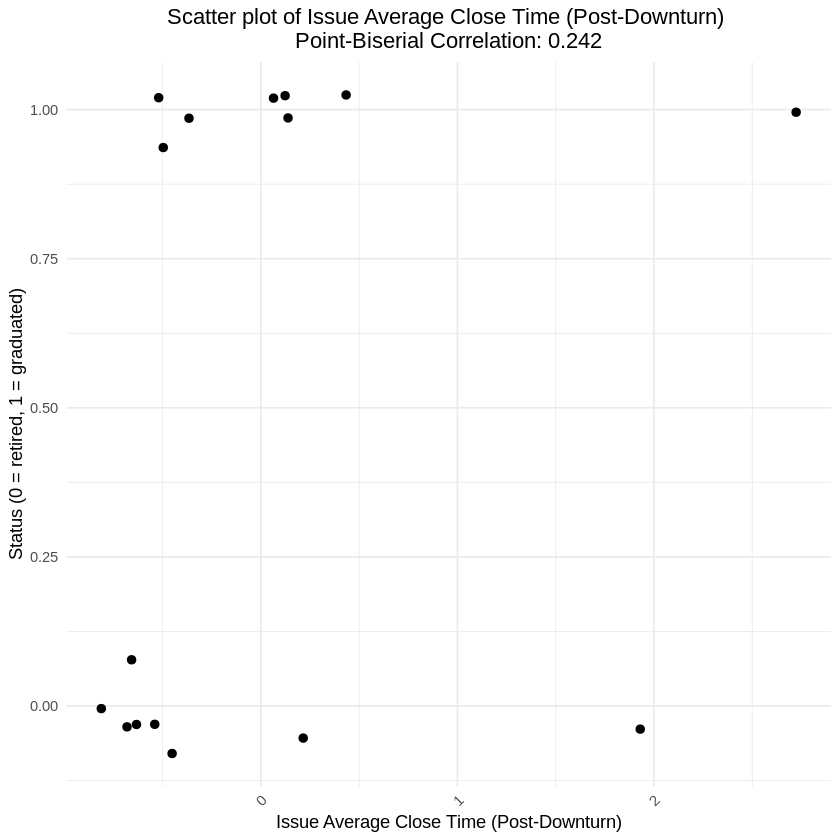

[1] "Point-Biserial correlation between changes_per_commit_post_downturn and status_numeric is: 0.358275809603302"


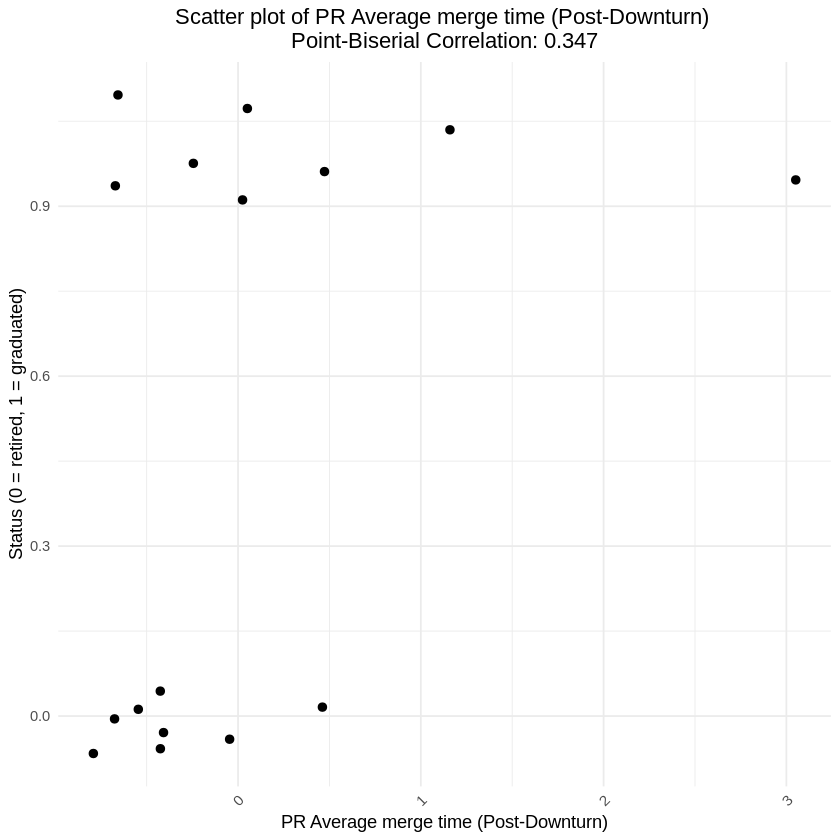

[1] "Point-Biserial correlation between ratio_mergedPR_post_downturn and status_numeric is: 0.0522799193797038"


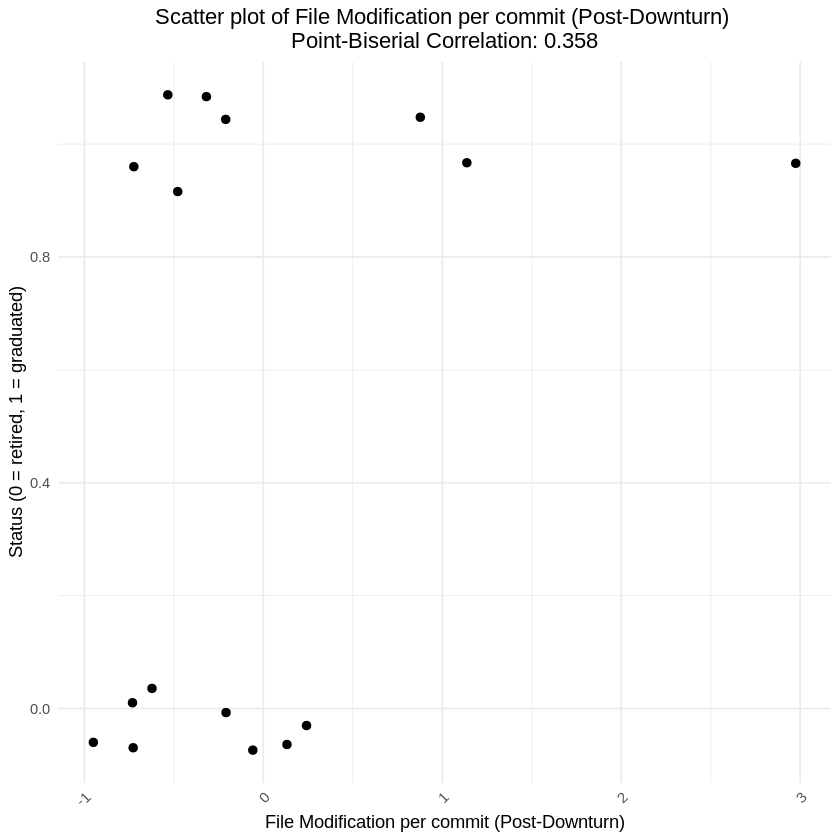

[1] "Point-Biserial correlation between num_issues_post_downturn and status_numeric is: 0.416056805824092"


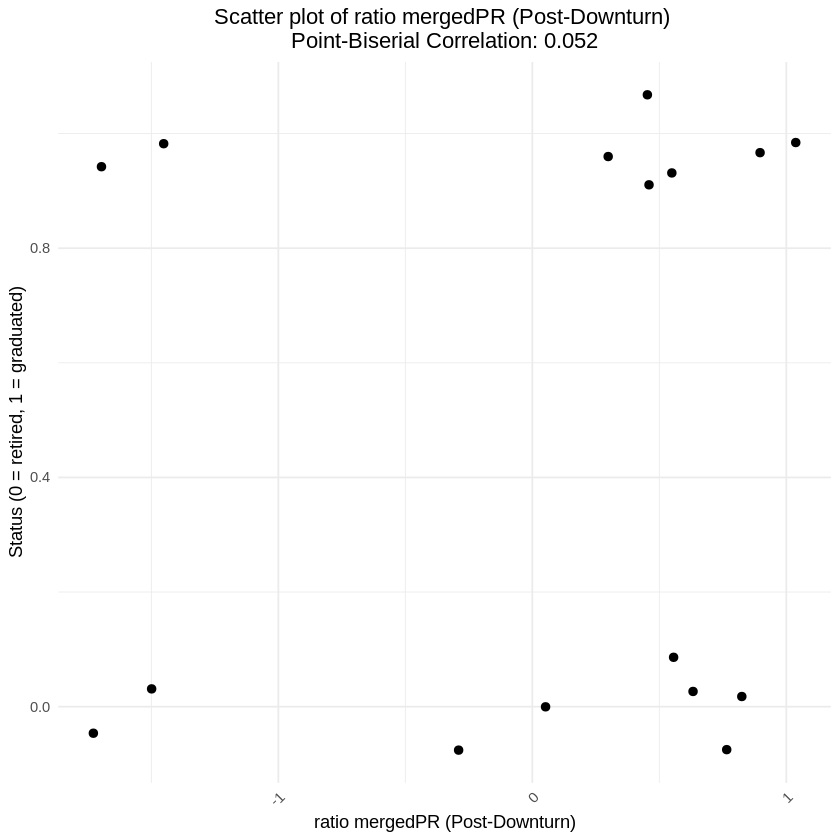

[1] "Point-Biserial correlation between ave_pr_comments_post_downturn and status_numeric is: 0.447834232282074"


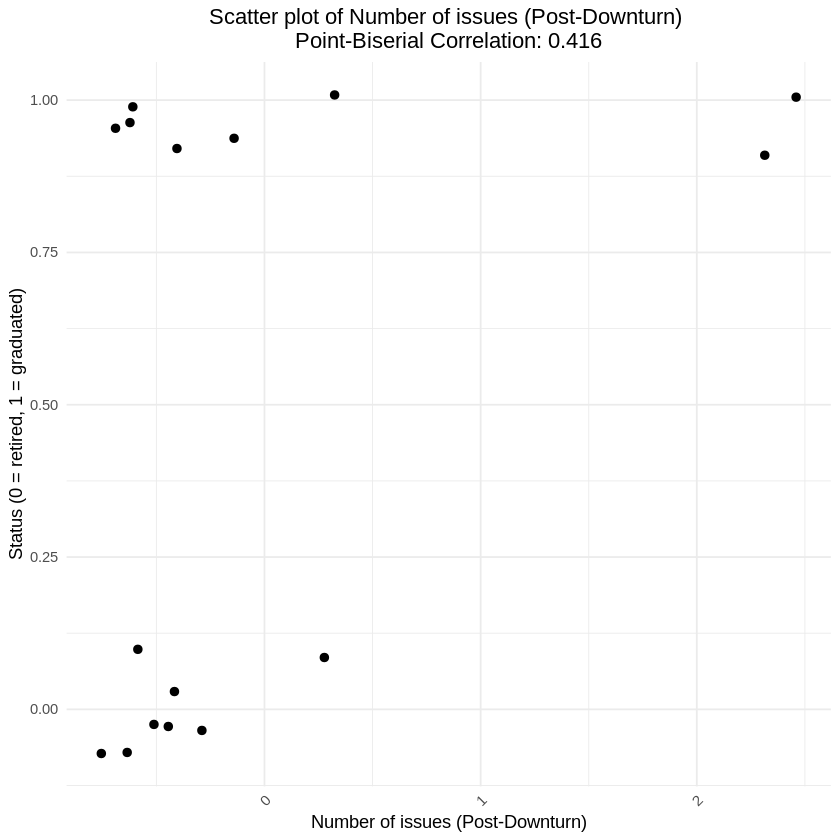

[1] "Point-Biserial correlation between num_merged_pr_post_downturn and status_numeric is: 0.360128580155739"


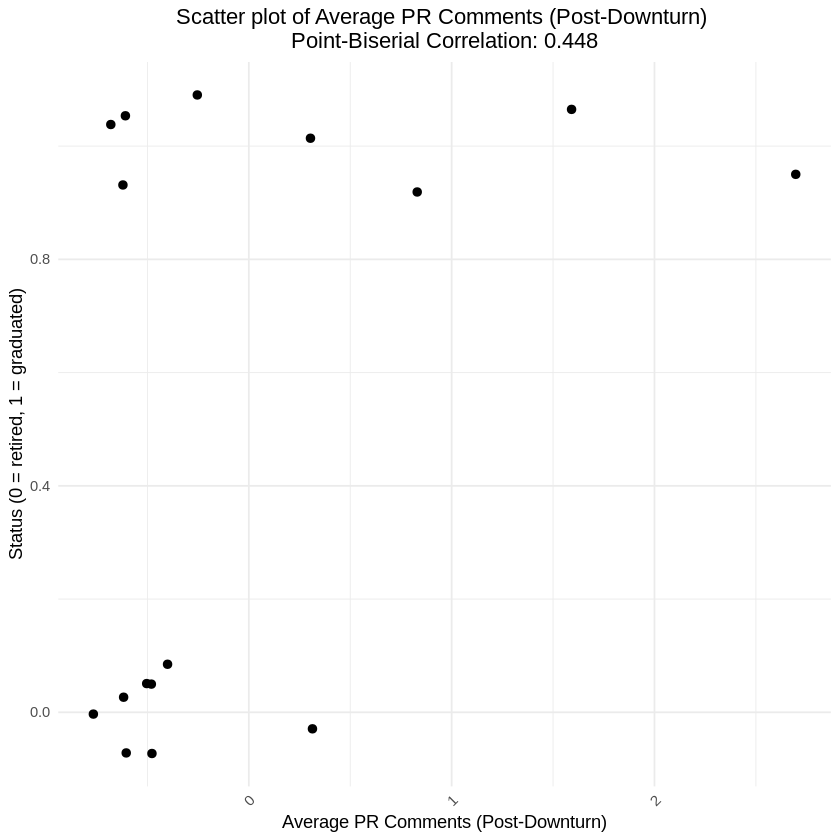

[1] "Point-Biserial correlation between num_closed_pr_post_downturn and status_numeric is: 0.455103774645673"


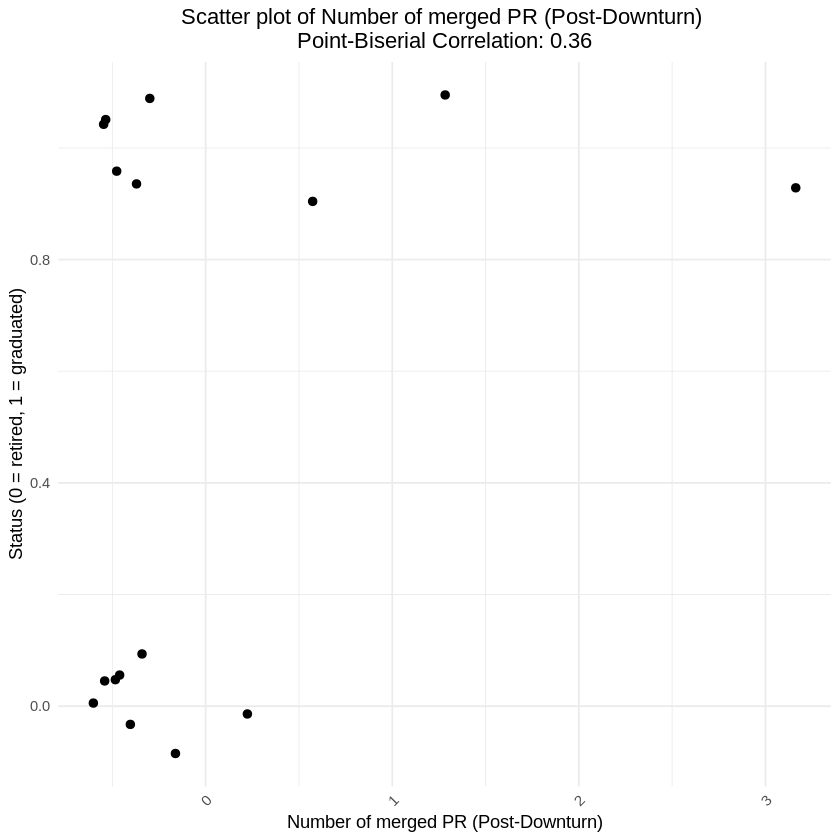

[1] "Point-Biserial correlation between avg_monthly_commit_post_downturn and status_numeric is: 0.396362034182543"


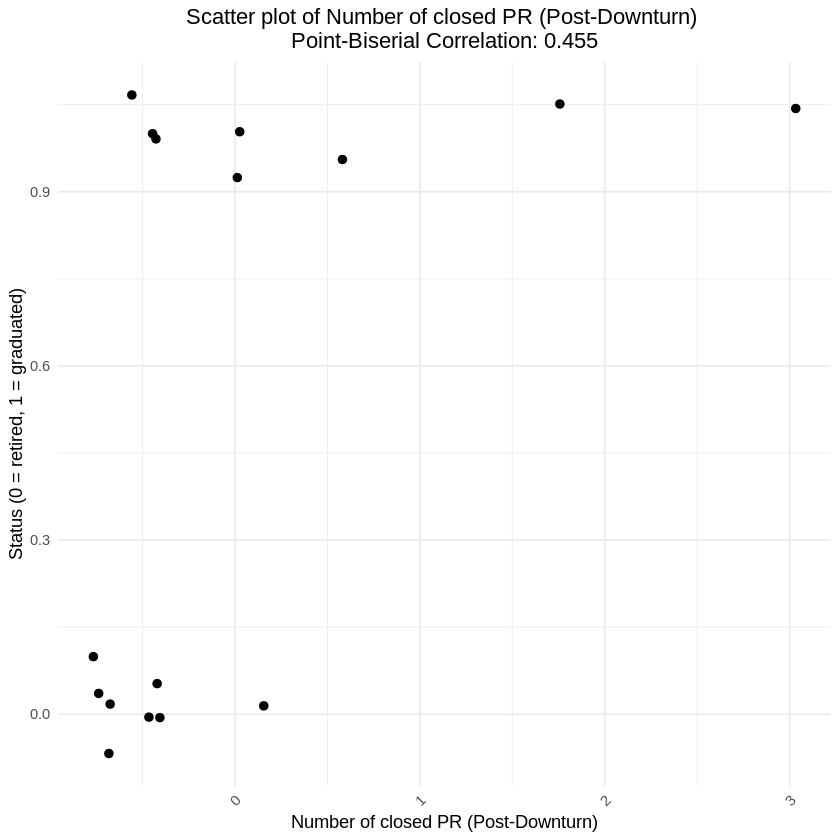

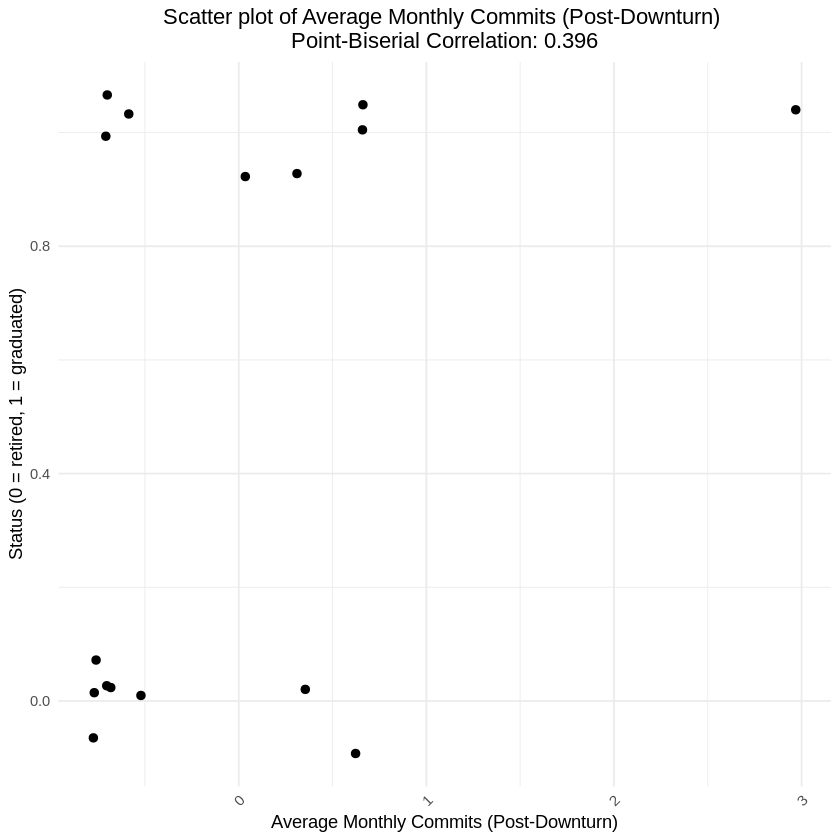

In [84]:
library(ggplot2)

dd$status_numeric <- ifelse(dd$status == "graduated", 1, 0)

# numeric_vars <- c('issue_average_close_time_pre_downturn', 'pr_ave_merge_time_pre_downturn', 'changes_per_commit_pre_downturn', 'ratio_mergedPR_pre_downturn', 'num_issues_pre_downturn', 'ave_pr_comments_pre_downturn', 'num_merged_pr_pre_downturn', 'num_closed_pr_pre_downturn', 'avg_monthly_commit_pre_downturn')
# numeric_vars <- c('issue_average_close_time_downturn', 'pr_ave_merge_time_downturn', 'changes_per_commit_downturn', 'ratio_mergedPR_downturn', 'num_issues_downturn', 'ave_pr_comments_downturn', 'num_merged_pr_downturn', 'num_closed_pr_downturn', 'avg_monthly_commit_downturn')
numeric_vars <- c('issue_average_close_time_post_downturn', 'pr_ave_merge_time_post_downturn', 'changes_per_commit_post_downturn', 'ratio_mergedPR_post_downturn', 'num_issues_post_downturn',  'ave_pr_comments_post_downturn', 'num_merged_pr_post_downturn', 'num_closed_pr_post_downturn', 'avg_monthly_commit_post_downturn')

unique_status_values <- unique(dd$status_numeric) # 使用status_numeric检查

# 如果status_numeric不仅包含0和1，打印警告消息
if(!all(unique_status_values %in% c(0, 1))) {
  print("Warning: Status_numeric variable contains values other than 0 and 1. Please check the data.")
} else {
  for(var in numeric_vars) {
    dd_clean <- na.omit(dd[, c("status_numeric", var)])

    if(length(unique(dd_clean$status_numeric)) < 2) {
      print(paste(var, "cannot compute correlation because 'status_numeric' does not vary."))
      next
    }

    if(sd(dd_clean[[var]], na.rm = TRUE) == 0) {
      print(paste(var, "cannot compute correlation because it does not vary."))
      next
    }

    # 创建一个易读的标题
    title <- gsub("_", " ", var)
    title <- gsub("post downturn", "(Post-Downturn)", title) # 先替换整个短语
    title <- gsub("pre downturn", "(Pre-Downturn)", title)
    title <- gsub("downturn", "(Downturn)", title) # 然后替换单独的单词
    title <- gsub("pr ave", "PR Average", title)
    title <- gsub("num", "Number of", title)
    title <- gsub("ave pr comments", "Average PR Comments", title)
    title <- gsub("avg monthly commit", "Average Monthly Commits", title)
    title <- gsub("pr", "PR", title)
    title <- gsub("changes", "File Modification", title)
    title <- gsub("ratio_mergedPR", "Merged PR ratio", title)
    title <- gsub("issue average close time", "Issue Average Close Time", title)
    readable_var <- title # 用于图表的易读变量名称


    # 计算点双列相关系数
    M1 <- mean(dd_clean[[var]][dd_clean$status_numeric == 1], na.rm = TRUE)
    M0 <- mean(dd_clean[[var]][dd_clean$status_numeric == 0], na.rm = TRUE)
    n1 <- sum(dd_clean$status_numeric == 1, na.rm = TRUE)
    n0 <- sum(dd_clean$status_numeric == 0, na.rm = TRUE)
    n <- n1 + n0
    SD <- sd(dd_clean[[var]], na.rm = TRUE)
    r_pb <- (M1 - M0) * sqrt(n1 * n0) / (n * SD)

    # 检查r_pb是否为NaN
    if(is.nan(r_pb)) {
      print(paste(var, "Point-Biserial Correlation calculation resulted in NaN."))
    } else {
      print(paste("Point-Biserial correlation between", var, "and status_numeric is:", r_pb))
    }

    # 绘制散点图
     p <- ggplot(dd_clean, aes(x = .data[[var]], y = .data[["status_numeric"]])) +
    geom_jitter(width = 0.2, height = 0.1, size = 2) +
    labs(title = paste("Scatter plot of", readable_var, "\nPoint-Biserial Correlation:", round(r_pb, 3)),
         x = readable_var, y = "Status (0 = retired, 1 = graduated)") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          plot.title = element_text(hjust = 0.5)) # 让标题居中

    print(p)
  }
}
